# Importing the required Libraries.

In [39]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [40]:
path='C:/Users/devar/Desktop/data set1'

In [41]:
os.chdir(path)

In [42]:
os.listdir()

['cast.csv',
 'Copy of Countif Exercise - 1.xlsx',
 'CORELATION ANALYSIS.csv',
 'Iphone Purchase data.csv',
 'salary and position.csv',
 'SATISTICS.xlsx',
 'Students.csv',
 'Titanic_dataset.csv']

In [43]:
data=pd.read_csv('Iphone Purchase data.csv')
data

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


# Data Preprocessing

In [44]:
data.info

<bound method DataFrame.info of      Gender  Age  Salary  Purchase Iphone
0      Male   19   19000                0
1      Male   35   20000                0
2    Female   26   43000                0
3    Female   27   57000                0
4      Male   19   76000                0
..      ...  ...     ...              ...
395  Female   46   41000                1
396    Male   51   23000                1
397  Female   50   20000                1
398    Male   36   33000                0
399  Female   49   36000                1

[400 rows x 4 columns]>

In [45]:
data.shape

(400, 4)

In [46]:
data.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

In [47]:
## Descriptive Statistics
data.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# EDA

In [48]:
data.count().isnull()

Gender             False
Age                False
Salary             False
Purchase Iphone    False
dtype: bool

<AxesSubplot:xlabel='Age', ylabel='Density'>

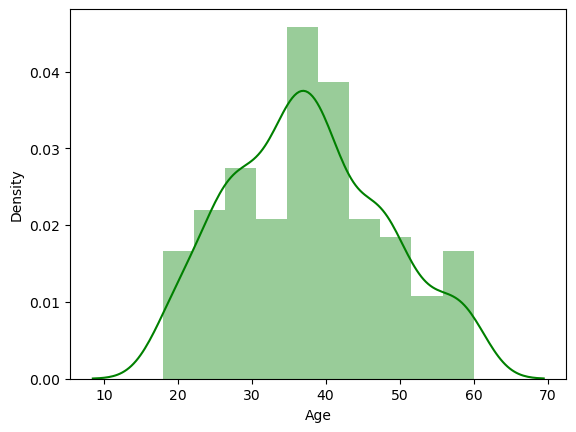

In [49]:
## Age Group Distribution
sns.distplot(data['Age'],color='green')

In [50]:
data["Age"].mean()

37.655

In [51]:
data.groupby(['Gender','Purchase Iphone']).size()

Gender  Purchase Iphone
Female  0                  127
        1                   77
Male    0                  130
        1                   66
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

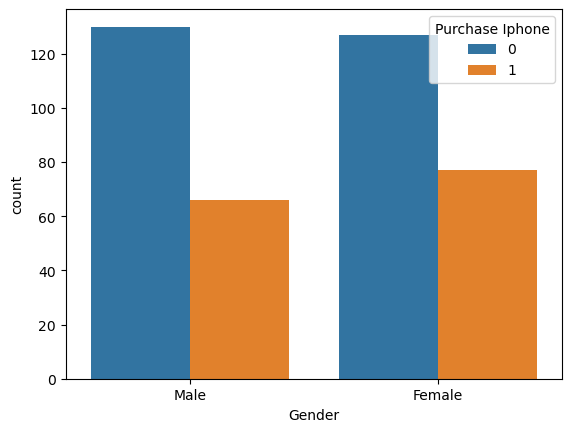

In [52]:
## By plot diagram
sns.countplot(x='Gender',hue='Purchase Iphone',data=data)

## By count plot we found that in Male customer Iphone purchase customer total 66 and Not Purchase customer 127
## By count plot we found that in Female customer Iphone purchase customer total 77 and Not Purchase customer 127

# Preparing the Data

In [53]:
## To make a decision tree, all data has to be numerical.
### We have to convert the non numerical column 'Gender' into numerical values.
data['Gender'].replace('Male','1', inplace=True)
data['Gender'].replace('Female','0', inplace=True)

In [54]:
X=data[['Gender','Age','Salary']]
y=data['Purchase Iphone']

In [55]:
X

,Gender,Age,Salary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [56]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64

# train,test split method

In [57]:
## The purpose of Train,Test,Split method is to avoid overfitting and get a Good model Accuracy

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0) ## 75% of data is used for Training Purpose

In [78]:
X_train.shape

(300, 3)

In [79]:
X_test.shape

(100, 3)

# Training the Algorithm

In [80]:
from sklearn.tree import DecisionTreeClassifier
model_ds=DecisionTreeClassifier(criterion='entropy',random_state=0)
model_ds.fit(X_train, y_train)
print("Training the Model is completed")

Training the Model is completed


In [81]:
X_train

,Gender,Age,Salary
250,0,44,39000
63,1,32,120000
312,0,38,50000
159,0,32,135000
283,0,52,21000
...,...,...,...
323,0,48,30000
192,1,29,43000
117,1,36,52000
47,0,27,54000


# Making Predictions

In [82]:
y_pred = model_ds.predict(X_test)

In [83]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [84]:
# Comparing Actual vs Predicted value
df = pd.DataFrame({'Actual': y_test, 'Classified':y_pred})  
display(df.head(10))

,Actual,Classified
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
60,0,0
155,0,0
261,1,1
141,0,0
214,0,0


# Evaluating the model

In [85]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred) 
print(cm)
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",accuracy)

[[63  5]
 [ 3 29]]
Accuracy score: 0.92
